In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#data = pd.read_csv(r"C:\Ran\Berkeley\IEOR\290\Project\Data\TrainingDatasetV1.csv", encoding = "utf_8")
data = pd.read_csv(r"C:\Ran\Berkeley\IEOR\290\Project\Data\TrainingDatasetV2.csv", encoding = "Latin1")

D:\Anaconda\envs\data-x\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (12,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
def ts(df):
    ts = df['Layoff Date']
    ts = pd.to_datetime(ts).dt.to_period('M').sort_values()

    pd.value_counts(ts).sort_index().plot.line()
    plt.title('# of candidates laid off in a particular month from 2014-01 to 2018-08')
    
def skillsets_general(df):
    # Counts of skillsets out of 8040 observations
    pd.value_counts(df['Skillset1']).plot.bar(figsize = (16,6))
    
    #Counting the most occurred primary skills
    skills_count = pd.value_counts(df['Skillset1']).to_frame()
    skills_count.rename(columns={'Skillset1': 'count'}, inplace=True)
    skills_count['Rank'] = range(1,len(skills_count)+1)
    skills_count['Cumulative Probability'] = np.cumsum(skills_count['count'])/np.sum(skills_count['count'])
    print(skills_count.head(30))
    
    ax = sns.lmplot(x='Rank', y='count', data=skills_count, fit_reg=False)
    ax.set(xscale="log", yscale="log")

    #Counting the most occurred secondary skills
    #pd.value_counts(df['Skillset2']).plot.bar(figsize = (16,6))
    
def dept(df):
    dept_count = pd.value_counts(df['Dept']).to_frame()
    dept_count.rename(columns={'Dept': 'count'}, inplace=True)
    dept_count['Rank'] = range(1,len(dept_count)+1)
    dept_count['Cumulative Probability'] = np.cumsum(dept_count['count'])/np.sum(dept_count['count'])
    print(dept_count.head(30))
    
def gender(df):
    pd.value_counts(df['Gender Flag']).plot.bar(figsize = (16,6))
    
def currently_employed(df):
    pd.value_counts(df['CurrentEmployFlag']).plot.bar(figsize = (16,6))
    plt.title('Current Employment status')
    
def skillsets_ts(df):
    f = plt.figure(1)
    
    SE = df[df['Skillset1'] == 'Software Engineering']
    ts_SE = SE['Layoff Date']
    ts_SE = pd.to_datetime(ts_SE).dt.to_period('M').sort_values()
    pd.value_counts(ts_SE).sort_index().plot.line(figsize = (16,6))

    sales = df[df['Skillset1'] == 'Sales']
    ts_sales = sales['Layoff Date']
    ts_sales = pd.to_datetime(ts_sales).dt.to_period('M').sort_values()
    pd.value_counts(ts_sales).sort_index().plot.line(figsize = (16,6))
    

    admin = df[df['Skillset1'] == 'Administration']
    ts_admin = admin['Layoff Date']
    ts_admin = pd.to_datetime(ts_admin).dt.to_period('M').sort_values()
    pd.value_counts(ts_admin).sort_index().plot.line(figsize = (16,6))

    PM = df[df['Skillset1'] == 'Product Management']
    ts_PM = PM['Layoff Date']
    ts_PM = pd.to_datetime(ts_PM).dt.to_period('M').sort_values()
    ts_PM
    pd.value_counts(ts_PM).sort_index().plot.line(figsize = (16,6))


    plt.legend(['Software Engineering', 'Sales', 'Administration', 'Product Management'], loc='upper right')
    plt.title('NUmber of candidates laid off according to different skillsets from 2014/01 to Aug 2018/08')
    plt.show()
    
    g = plt.figure(2)
    EE = df[df['Skillset1'] == 'Electrical Engineering']
    ts_EE = EE['Layoff Date']
    ts_EE = pd.to_datetime(ts_EE).dt.to_period('M').sort_values()
    pd.value_counts(ts_EE).sort_index().plot.line(figsize = (16,6))

    BD = df[df['Skillset1'] == 'Business Development']
    ts_BD = BD['Layoff Date']
    ts_BD = pd.to_datetime(ts_BD).dt.to_period('M').sort_values()
    ts_BD
    pd.value_counts(ts_BD).sort_index().plot.line(figsize = (16,6))

    HR = df[df['Skillset1'] == 'Human Resources']
    ts_HR = HR['Layoff Date']
    ts_HR = pd.to_datetime(ts_HR).dt.to_period('M').sort_values()
    pd.value_counts(ts_HR).sort_index().plot.line(figsize = (16,6))

    MT = df[df['Skillset1'] == 'Mobile Telecommunications']
    ts_MT = MT['Layoff Date']
    ts_MT = pd.to_datetime(ts_MT).dt.to_period('M').sort_values()
    pd.value_counts(ts_MT).sort_index().plot.line(figsize = (16,6))
    
    plt.legend(['Electrical Engineering', 'Business Development', 'Human Resources', 'Mobile Telecommunications'], loc='upper right')
    plt.title('NUmber of candidates laid off according to different skillsets from 2014/01 to Aug 2018/08')
    plt.show()


In [4]:
def EDA_on_laid_off(df): #Input df is the global training dataset
    
    df_laid_off = df[df['laid_off'] == 1]
    
    print("Dataframe shape:", df.shape)
    plt.figure(1)
    # Time Series analysis, y-value is the # of candidates being laid off in a particular month from 2014-01 to 2018-08
    ts(df_laid_off)
    plt.show()
    
    #Counting the most occurred primary skills
    plt.figure(2)
    skillsets_general(df_laid_off)
    plt.show()
    
    plt.figure(3)
    # Department Information
    dept(df_laid_off)
    plt.show()
    
    plt.figure(4)
    # Gender Distribution (1: female; 2: male; 0: unknown)
    gender(df_laid_off)
    plt.show()
    
    plt.figure(5)
    # Whether currently employed or not
    currently_employed(df_laid_off)
    plt.show()
    
    # Time series of specific skillsets
    skillsets_ts(df_laid_off)
    
    

Dataframe shape: (106108, 29)


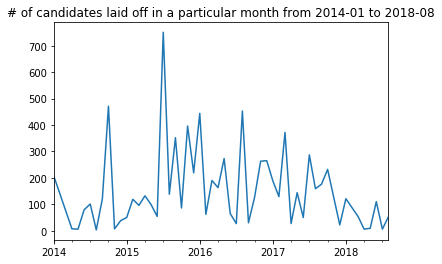

                                      count  Rank  Cumulative Probability
Software Engineering                   1411     1                0.175498
Sales                                  1102     2                0.312562
Electrical Engineering                 1033     3                0.441045
Web Development                         669     4                0.524254
Administration                          571     5                0.595274
Mobile Telecommunications               563     6                0.665299
Product Management                      411     7                0.716418
IT Management and Support               334     8                0.757960
Web Design                              264     9                0.790796
Human Resources                         233    10                0.819776
Finance                                 210    11                0.845896
Digital Marketing                       201    12                0.870896
Business Development                  

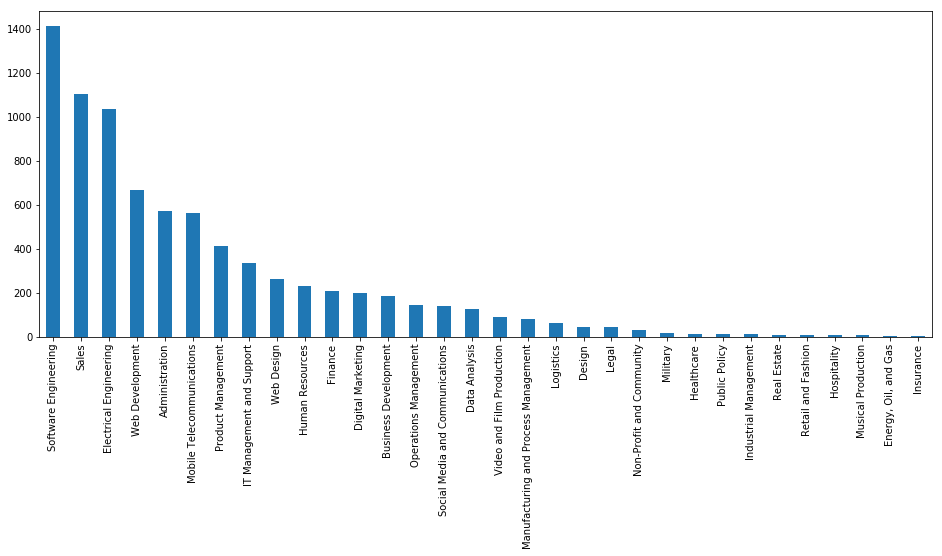

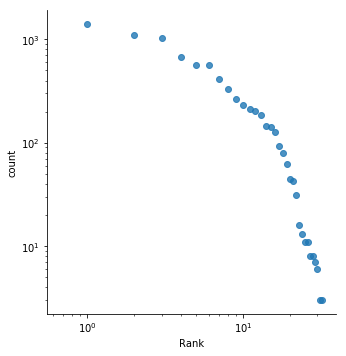

                              count  Rank  Cumulative Probability
TECHNOLOGY                     2107     1                0.385122
MARKETING                       685     2                0.510327
BUSINESS                        277     3                0.560958
PRODUCTION                      218     4                0.600804
OPERATIONS                      202     5                0.637726
OVERSIGHT                       166     6                0.668068
ACCOUNTING                      161     7                0.697496
HR                              140     8                0.723085
MARKETING,TECHNOLOGY            137     9                0.748126
TECHNOLOGY,OVERSIGHT             79    10                0.762566
PRODUCTION,TECHNOLOGY            78    11                0.776823
MARKETING,BUSINESS               72    12                0.789984
OPERATIONS,BUSINESS              70    13                0.802778
MARKETING,OVERSIGHT              66    14                0.814842
OPERATIONS

<Figure size 432x288 with 0 Axes>

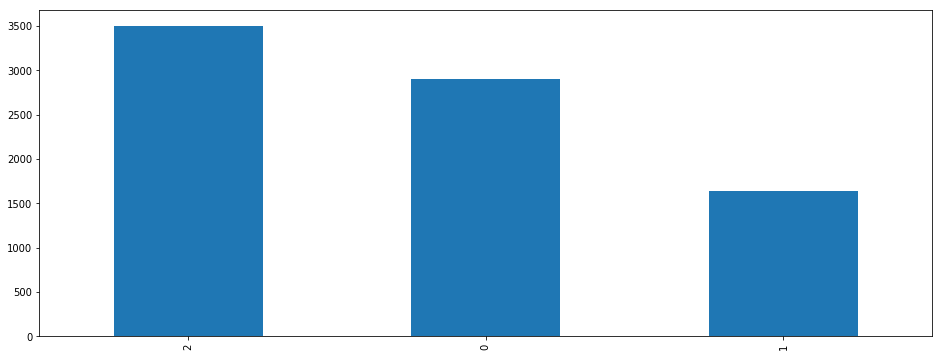

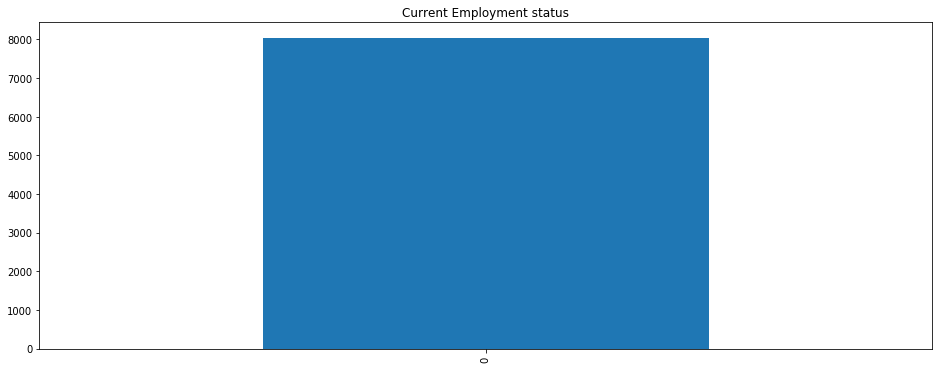

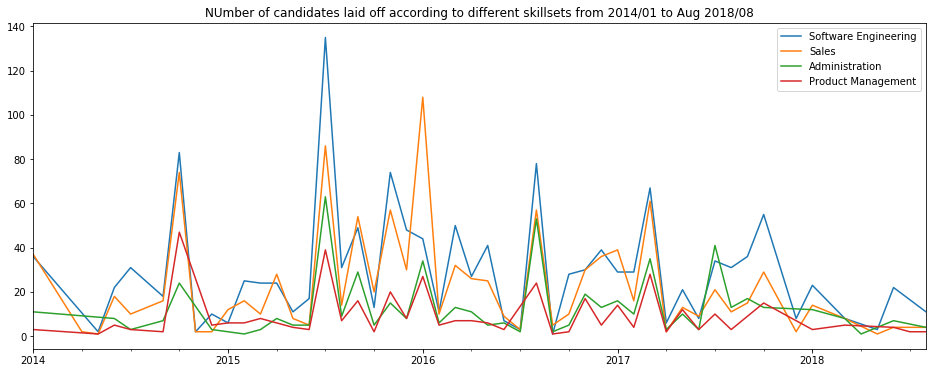

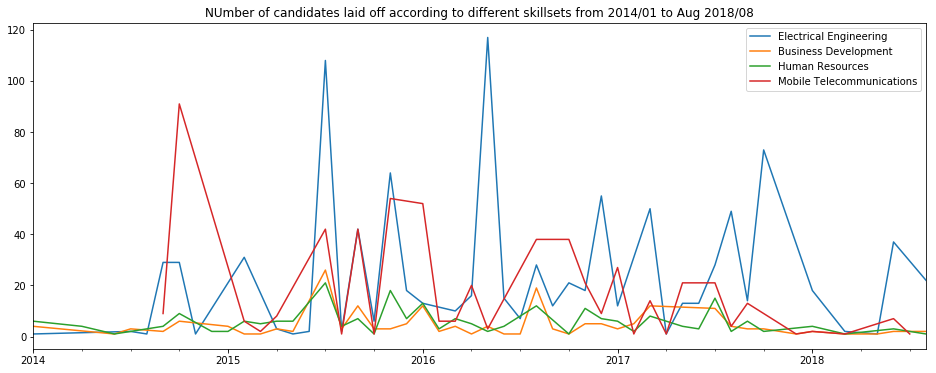

In [8]:
EDA_on_laid_off(data)